In [198]:
from sympy import simplify, lambdify, latex, Symbol
from sympy.abc import k, n, c
from sympy.concrete.summations import summation
import matplotlib.pyplot as plt
import numpy as np
#from sympy.plotting import plot

p = Symbol('p', positive=True)

In [199]:
pmf = p * (1 - p) ** (n - k)

pmf

p*(1 - p)**(-k + n)

In [200]:
latex(pmf)

'p \\left(1 - p\\right)^{- k + n}'

In [201]:

f1 = p*(1-p)**(n) * (((1-p)**(-1)-(1+n)*((1-p)**(-n-1)))/(1-(1-p)**(-1)) + ((1-p)**(-2))*(1-(1-p)**(-n))/((1-(1-p)**(-1))**2))

f1

p*(1 - p)**n*((-(1 - p)**(-n - 1)*(n + 1) + 1/(1 - p))/(1 - 1/(1 - p)) + (1 - 1/(1 - p)**n)/((1 - p)**2*(1 - 1/(1 - p))**2))

In [202]:
f2 = simplify(f1)

f2

(p*(n - (1 - p)**n + 1) + (1 - p)**n - 1)/p

In [203]:
latex(f2)

'\\frac{p \\left(n - \\left(1 - p\\right)^{n} + 1\\right) + \\left(1 - p\\right)^{n} - 1}{p}'

In [204]:
f3 = n + ((1-p)**(n+1)-(1-p))/p

f3

n + (p + (1 - p)**(n + 1) - 1)/p

In [205]:
f4s = summation(k * pmf, (k, 0, n))
f4 = simplify(f4s)
f4

n - (1 - p)**n + 1 + (1 - p)**n/p - 1/p

In [206]:
fun1 = lambdify((p, n), f1)
fun2 = lambdify((p, n), f2)
fun3 = lambdify((p, n), f3)
fun4 = lambdify((p, n), f4)

fun1v = np.vectorize(fun1, excluded=['n'])
fun2v = np.vectorize(fun2, excluded=['n'])
fun3v = np.vectorize(fun3, excluded=['n'])
fun4v = np.vectorize(fun4, excluded=['n'])

In [207]:
_p=0.7
_n=100
print(fun1(_p, _n))
print(fun2(_p, _n))
print(fun3(_p, _n))
print(fun4(_p, _n))

99.57142857142858
99.57142857142856
99.57142857142857
99.57142857142857


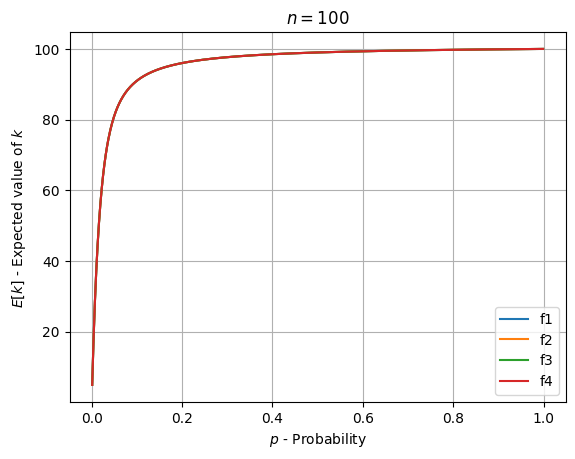

In [208]:
#plot(f2.subs(N, 100), (p, 0.1, 0.9)) #, ylim=(0, 100))

ps = np.linspace(0.001,0.999,1000)
fig, ax = plt.subplots()
ax.plot(ps, fun1v(ps, _n), label='f1')
ax.plot(ps, fun2v(ps, _n), label='f2')
ax.plot(ps, fun3v(ps, _n), label='f3')
ax.plot(ps, fun4v(ps, _n), label='f4')
ax.legend()
ax.set_xlabel("$p$ - Probability")
ax.set_ylabel("$E[k]$ - Expected value of $k$")
ax.set_title(f"$n={_n}$")
ax.grid()

In [209]:
# Variance
fv = summation((k**2)*p*(1-p)**(n-k), (k, 0, n))-f4s**2
fv

-(n*p - p*(1 - p)**n + p + (1 - p)**n - 1)**2/p**2 + (n**2*p**2 + 2*n*p**2 - 2*n*p - p**2*(1 - p)**n + p**2 + 3*p*(1 - p)**n - 3*p - 2*(1 - p)**n + 2)/p**2

In [210]:
simplify(fv)

2*n*(1 - p)**n - 2*n*(1 - p)**n/p - (1 - p)**(2*n) + (1 - p)**n + 2*(1 - p)**(2*n)/p - (1 - p)**n/p - 1/p - (1 - p)**(2*n)/p**2 + p**(-2)

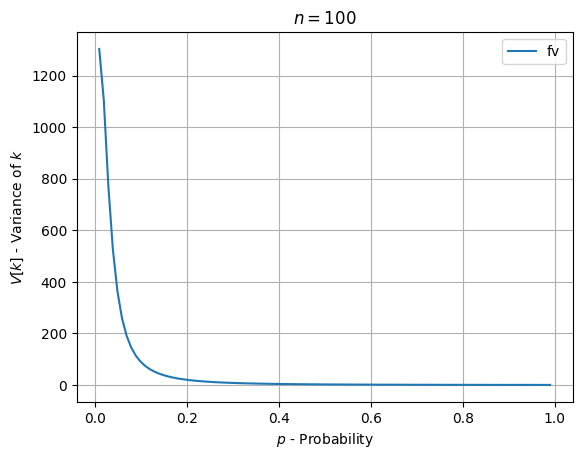

In [211]:
fvl = lambdify((p, n), fv)

#fvl(0.5, 10)
fvv = np.vectorize(fvl, excluded=['n', 'k'])
#_n = 2
ps = np.linspace(0.01,0.99,100)
fig, ax = plt.subplots()
ax.plot(ps, fvv(ps, _n), label='fv')
#ax.plot(ps, -(ps-0.5)**2+0.25, label='mine')
#ax.plot(ps, -np.power(fun2v(ps, N_), 2), label='EV^2')
ax.set_xlabel("$p$ - Probability")
ax.set_ylabel("$V[k]$ - Variance of $k$")
ax.set_title(f"$n={_n}$")

ax.legend()
ax.grid()